# Cartier Jewelry Classification

![](https://images.businessoffashion.com/site/uploads/2018/02/Cartier.jpg)

### Contents
1. Abstract
2. Dataset
3. Goal
4. Importing libraries and dataset
5. Exploratory Data Analysis
    - Which gem are mostly used in the products?
    - Which metal mostly used in Cartier Jewellery?
    - How much is the mean of Cartier jewellery as metal type?
    - How much the mean price for every metal type in cartier jewels?
    - How many gems in every jewels category?
    - How much the gem price in every jewels category?
    - Which gem is the most expensive?
6. Classification Model
    - KNN Classifier
    - Logistic Regression
    - Random Forest Classifier
    - Support Vector Machine Classifier
    - XgBoost Classifier
    - Gaussian Naive Bayes
    - Decision Tree Classifier
7. Model Comparison
8. Conclusion
    

### Abstract
Cartier International SNC, or simply Cartier (/ˈkɑːrtieɪ/; French: [kaʁtje]), is a French luxury goods conglomerate which designs, manufactures, distributes, and sells jewellery and watches. Founded by Louis-François Cartier in Paris in 1847, the company remained under family control until 1964. The company maintains its headquarters in Paris, although it is a wholly owned subsidiary of the Swiss Richemont Group. Cartier operates more than 200 stores in 125 countries, with three Temples (Historical Maisons) in London, New York, and Paris.

Cartier is regarded as one of the most prestigious jewellery manufacturers in the world. In 2018, it is ranked by Forbes as the world's 59th most valuable brand. Cartier has a long history of sales to royalty. King Edward VII of Great Britain referred to Cartier as "the jeweller of kings and the king of jewellers." For his coronation in 1902, Edward VII ordered 27 tiaras and issued a royal warrant to Cartier in 1904. Similar warrants soon followed from the courts of Spain, Portugal, Russia and the House of Orleans.

### Dataset
The Dataset is collected from Kaggle website. Here is the link : https://www.kaggle.com/marcelopesse/cartier-jewelry-catalog?select=cartier_catalog.csv

### Goal
The goal of this project is to make a classification model, which will classify the jewelries based on the various features.

### Importing the required libraries and dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cartier = pd.read_csv('cartier_catalog.csv')

In [3]:
cartier.head(5)

,ref,categorie,title,price,tags,description,image
0,B4084600,rings,Love ring,1650.0,yellow gold,"Love ring, 18K yellow gold. Width: 5.5mm.",/content/dam/rcq/car/58/71/74/587174.png
1,B4084900,rings,Love ring,3650.0,platinum,"Love ring, 950/1000 platinum. Width: 5.5mm.",/content/dam/rcq/car/19/43/98/1/1943981.png
2,B4084800,rings,Love ring,1650.0,pink gold,"Love ring, 18K rose gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/64/0/1028640.png
3,B4084700,rings,Love ring,1770.0,white gold,"Love ring, 18K white gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/63/6/1028636.png
4,B4085000,rings,Love wedding band,1070.0,yellow gold,"Love wedding band, 18K yellow gold. Width: 3.6mm.",/content/dam/rcq/car/59/18/04/591804.png


In [4]:
# Define tag_splitter // splits column  
def tag_spiliter(dataframe , col_name , delimiter , metal , first_gem , second_gem , third_gem , foruth_gem):
    dataframe['str_split'] = dataframe[col_name].str.split(delimiter)
    dataframe[metal] = dataframe.str_split.str.get(0).str.strip()
    dataframe[first_gem] = dataframe.str_split.str.get(1).str.strip()
    dataframe[second_gem] = dataframe.str_split.str.get(2).str.strip()
    dataframe[third_gem] = dataframe.str_split.str.get(3).str.strip()
    dataframe[foruth_gem] = dataframe.str_split.str.get(4).str.strip()
    dataframe.fillna(0 , inplace=True)
    del dataframe['str_split']

In [5]:
# Recall tag_splitter
tag_spiliter(cartier , 'tags' , ',' , 'metal' , 'gem' , 'second_gem' , 'third_gem' , 'foruth_gem')

*******************************
## A. Exploratory Data Analysis
Exploratory Data Analysis - does this for Machine Learning enthusiast. It is a way of visualizing, summarizing and interpreting the information that is hidden in rows and column format.

### 1. Which gem are mostly used in the products?

In [6]:
# Drop redundant columns
cartier.drop(['ref' , 'image' , 'tags' , 'title' , 'description'] , axis  = 1 , inplace=True)
gems = pd.concat([cartier["gem"],cartier["second_gem"],cartier["third_gem"],cartier["foruth_gem"]], axis= 0)
gems_values = gems.value_counts()[1:].to_frame()
gems_values.reset_index(inplace=True)
gems_values.columns = ['gem_type' , 'count']

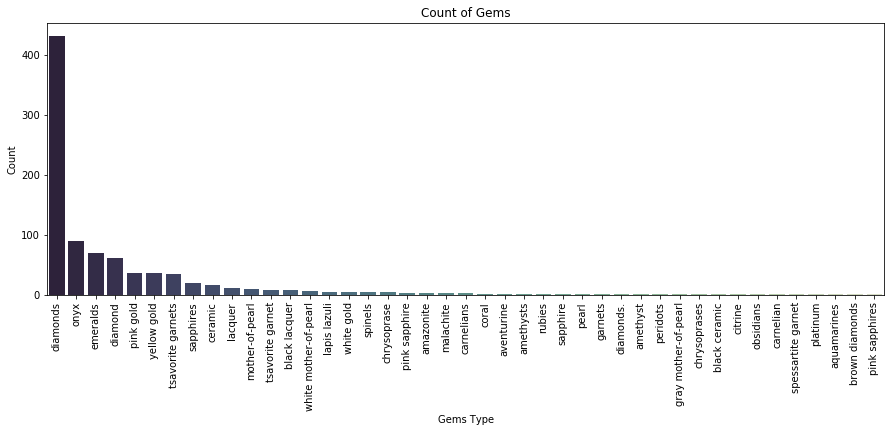

In [7]:
plt.figure(figsize=(15, 5))
sns.barplot(x= 'gem_type', y= "count", data= gems_values,
            palette= sns.cubehelix_palette(len(gems_values.gem_type), start=.5, rot=-.75, reverse= True))
plt.xlabel("Gems Type")
plt.ylabel("Count")
plt.title("Count of Gems")
plt.xticks(rotation= 90)
plt.show()

**Observation :** 
A glance at the above figure reveals to us that diamonds in all products are the most used gem, about **66 percent** of the product have diamonds in them, more than any other gems, Its most popular gem. onyx and emeralds are into the next ranks. 

In [8]:
# Dictionary for costum color palette 
color_dict = {'yellow gold': "#fcc72d", 
              'platinum': "#e5e4e2", 
              'pink gold': "#e9cdd0", 
              'white gold': "#f9f3d1", 
              'non-rhodiumized white gold': "#C0C0C0"}

### 2. Which metal mostly used in Cartier Jewellery?

In [9]:
cartier_category_metal = cartier.groupby('categorie')['metal'].value_counts().to_frame()
cartier_category_metal.columns = ['count']
cartier_category_metal.reset_index(level = [0 , 1] , inplace=True)

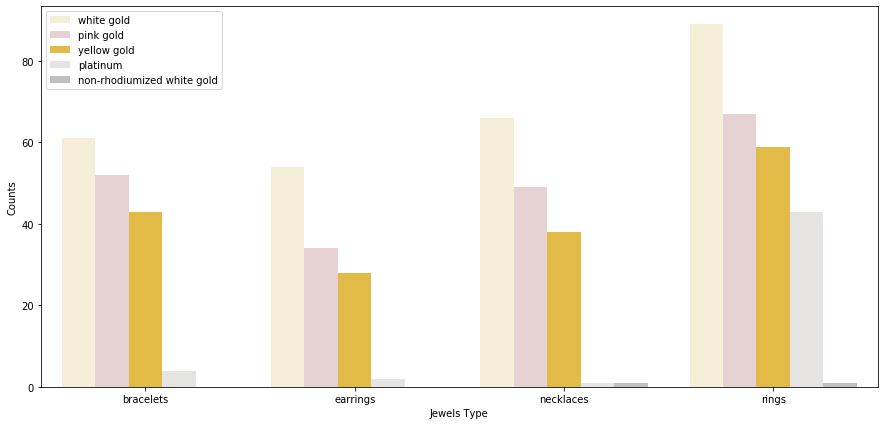

In [10]:
plt.figure(figsize=(15, 7))
sns.barplot(x= "categorie", y= "count", hue= "metal", data= cartier_category_metal, 
            palette= color_dict)
plt.xlabel("Jewels Type")
plt.ylabel("Counts")
plt.legend(loc= "upper left")
plt.show()

**Observation :** 
Jewels type include 4 category: **rings, earring, necklaces and bracelets** \
Ranks of metals in every category are the same and equal: 1.White Gold 2.Pink Gold 3.Yellow Gold 4.Platinum 5.Non-Rhodiumized White Gold

### 3. How much is the mean of Cartier jewellery as metal type?

In [11]:
cartier_gp1 = cartier.groupby(["categorie", "metal"])["price"].mean().round(2).to_frame()
cartier_gp1 = cartier_gp1.reset_index()

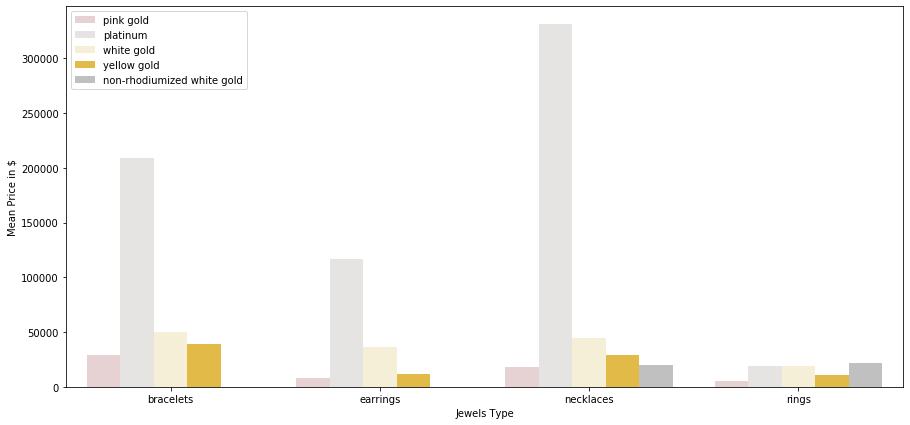

In [12]:
plt.figure(figsize=(15, 7))
sns.barplot(x= 'categorie', y= 'price', hue= 'metal', data= cartier_gp1 , palette = color_dict)
plt.xlabel('Jewels Type')
plt.ylabel('Mean Price in $')
plt.legend(loc= "upper left")
plt.show()

**Observation :** In every category **Platinum** in most valuable metal with a huge difference in price as $. After that White Gold have a second place but other metals are close in price for every category

### 4. How much the mean price for every metal type in cartier jewels?

In [13]:
cartier_gp2 = cartier.groupby("metal")["price"].mean().round(2).to_frame()
cartier_gp2.reset_index(inplace=True)

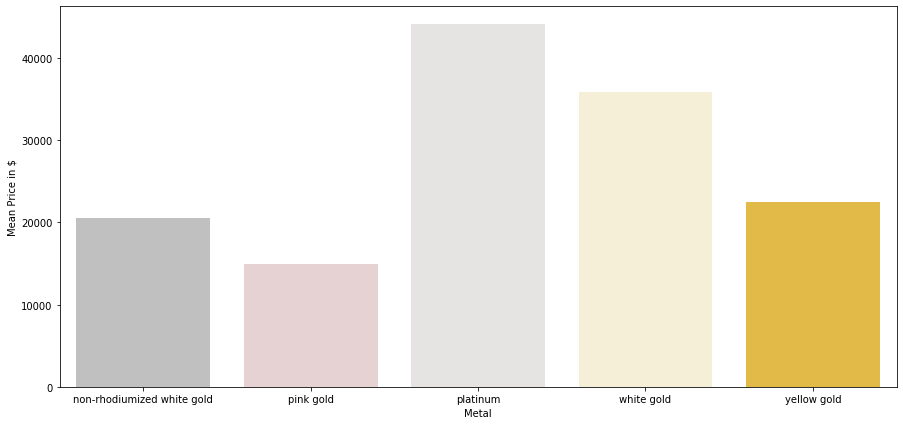

In [14]:
plt.figure(figsize=(15, 7))
sns.barplot(x= "metal" , y = 'price', data=cartier_gp2 , palette = color_dict)
plt.xlabel('Metal')
plt.ylabel('Mean Price in $')
plt.show()

**Observation :** As we saw earlier Platinium is the most valuable metal that the Cartier used in jewels. The mean price of Platinium jewels is more than **40000** Dollars after that white metal is second. "Yellow Gold" and "Non-Rhodiumized White Gold" are about equal in mean price, in last is pink gold with mean of **15000** Dollars that is about one of third of Platinium

### 5. How many gems in every jewels category?

In [15]:
cartier_gp_gem = cartier.groupby('categorie')['gem'].value_counts().to_frame()
cartier_gp_gem.columns = ['count']
cartier_gp_gem.reset_index(level = [0 , 1] , inplace=True)
cartier_gp_gem = cartier_gp_gem[cartier_gp_gem["gem"] != 0]

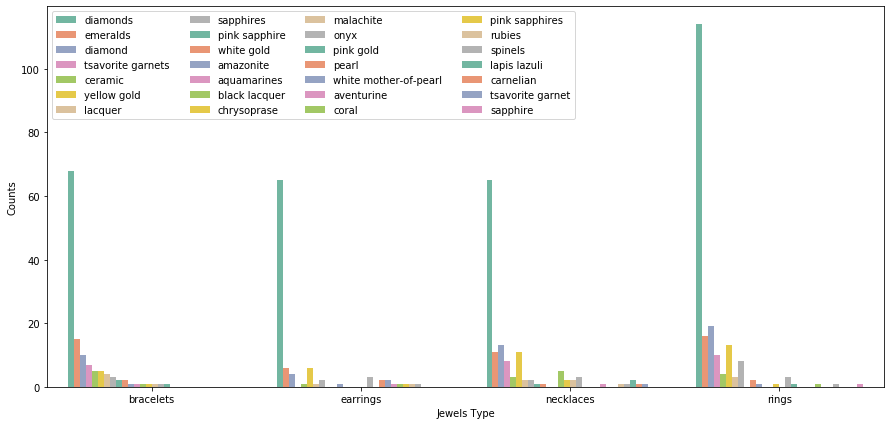

In [16]:
plt.figure(figsize=(15, 7))
sns.barplot(x= 'categorie', y= 'count', hue= 'gem', data= cartier_gp_gem , palette = sns.color_palette("Set2"))
plt.xlabel('Jewels Type')
plt.ylabel('Counts')
plt.legend(ncol=4, loc= 'upper left')
plt.show()

**Observation :** 
In all categories, **diamond** is the most popular gem in the making of jewelry.  Exceedingly over 100 ring types include **diamonds**, in most cases more than one piece of **diamond**. This also rules for other categories of jewelry such as **earrings**, **necklaces**, and **bracelets**. Variety of the gems used in **rings** and **bracelets** are more than **earrings** and **necklaces**. Furthermore, **Sapphires** are also a popular gem used in **ring** production.

### 6. How much the gem price in every jewels category?

In [17]:
cartier_gp1_gem = cartier.groupby(["categorie", "gem"])["price"].mean().round(2).to_frame()
cartier_gp1_gem = cartier_gp1_gem.reset_index()
cartier_gp1_gem = cartier_gp1_gem[cartier_gp1_gem["gem"] != 0]

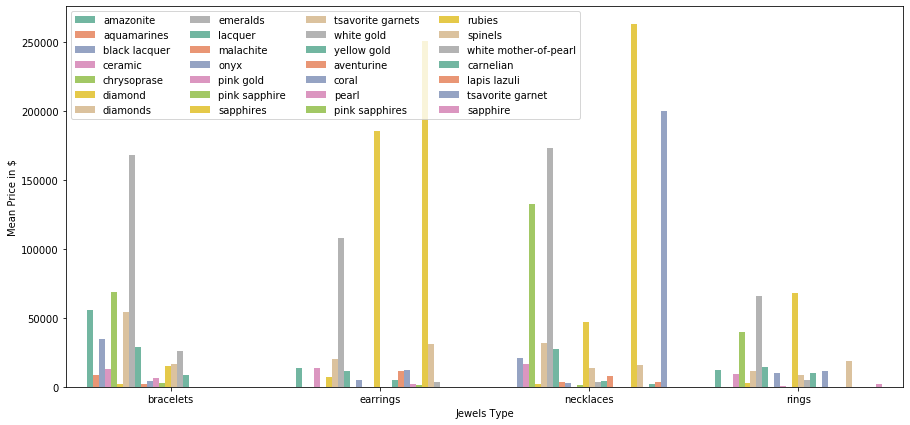

In [18]:
plt.figure(figsize=(15, 7))
sns.barplot(x= 'categorie', y= 'price', hue= 'gem', data= cartier_gp1_gem , palette = sns.color_palette("Set2"))
plt.xlabel('Jewels Type')
plt.ylabel('Mean Price in $')
plt.legend(ncol=4, loc= 'upper left')
plt.show()

**Observation :** Earrings, Necklaces, and Rings with Rubies(gem) has a huge difference in the price of jewelry, but Emeralds(gem) in Bracelets shows the is a key factor in price determination. A closer look at necklaces reveals us that Tsavorite garnet has third place in price.

### 7. Which gem is the most expensive?

In [19]:
cartier_gp2_gem = cartier.groupby("gem")["price"].mean().round(2).to_frame()
cartier_gp2_gem.reset_index(inplace=True)
cartier_gp2_gem = cartier_gp2_gem[(cartier_gp2_gem['gem'] != 'white gold') &
                                  (cartier_gp2_gem['gem'] != 'yellow gold') & 
                                  (cartier_gp2_gem['gem'] != 0)]

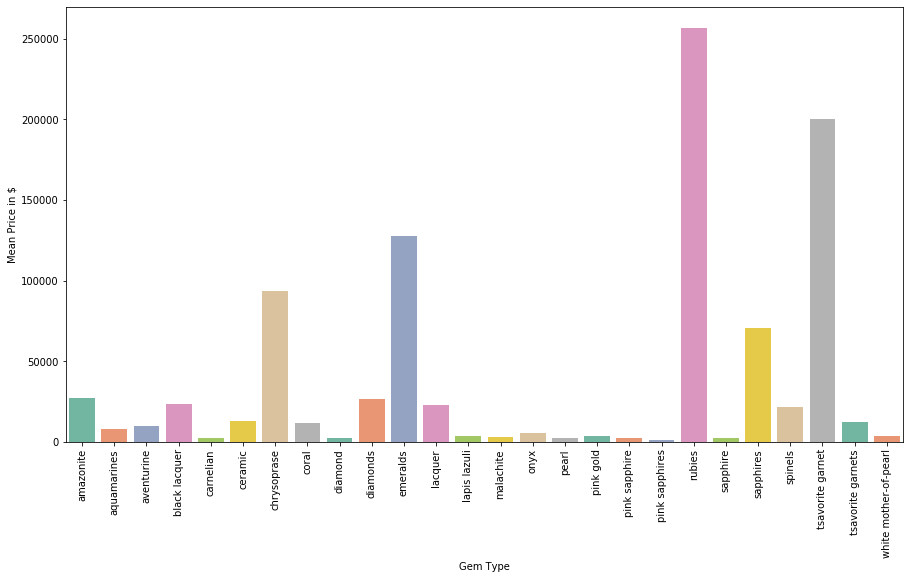

In [20]:
plt.figure(figsize=(15, 8))
sns.barplot(x= 'gem' , y = 'price', data=cartier_gp2_gem ,  palette = sns.color_palette("Set2"))
plt.xlabel('Gem Type')
plt.ylabel('Mean Price in $')
plt.xticks(rotation=90)
plt.show()

**Observation :** This plot shows us the mean price of products with gems on them
As we could have predicted products that have Rubies on them are the most expensive jewelry in Cartier products. the next ranks belong to Tsavorite garnets, Emeralds, and the Chrysoprase. The middle gems on the above figure are equal in mean price 

*******************************
## B. Classification Models
The Classification algorithm is a Supervised Learning technique that is used to identify the category of new observations on the basis of training data. In Classification, a program learns from the given dataset or observations and then classifies new observation into a number of classes or groups.

Here after visualizing the dataset I have decided to go with these models -
* **KNN algorithm** : K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories. K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.


* **Logistic Regression** : Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).


* **Random Forest Classifier** : Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.


* **Support Vector Machine Algorithm** : Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.
 

* **XgBoost Classifier Algortihm** : XGBoost provides a wrapper class to allow models to be treated like classifiers or regressors in the scikit-learn framework. The XGBoost model for classification is called XGBClassifier. We can create and and fit it to our training dataset. Models are fit using the scikit-learn API and the model.


* **Decision Tree Classifier** : Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.


* **Gausian NB** : This method is expected to be called several times consecutively on different chunks of a dataset so as to implement out-of-core or online learning. This is especially useful when the whole dataset is too big to fit in memory at once. This method has some performance and numerical stability overhead, hence it is better to call partial_fit on chunks of data that are as large as possible (as long as fitting in the memory budget) to hide the overhead.

Let's deploy the models!!

Now, as we have done all the required visualisations and data wrangling/cleaning operations, we shall focus on applying numerous ML algorithms to see if we can predict the placement status of a student accurately.

In [22]:
ds = pd.read_csv('cartier_catalog.csv')


In [23]:
ds.drop(['ref','description','image'], axis = 1, inplace=True)
ds

,categorie,title,price,tags
0,rings,Love ring,1650.0,yellow gold
1,rings,Love ring,3650.0,platinum
2,rings,Love ring,1650.0,pink gold
3,rings,Love ring,1770.0,white gold
4,rings,Love wedding band,1070.0,yellow gold
...,...,...,...,...
687,earrings,Clash de Cartier earrings Small Model,7500.0,pink gold
688,earrings,Clash de Cartier earrings Small Model,3900.0,pink gold
689,earrings,Clash de Cartier earrings Diamonds,13700.0,"pink gold, diamonds"
690,earrings,Clash de Cartier earring Large Model,13700.0,"pink gold, amazonite"


**Imposing Label Encoder**

In [24]:
# Converting strings columns into integar

from sklearn.preprocessing import LabelEncoder

categorie = LabelEncoder()
title = LabelEncoder()
tags = LabelEncoder()

ds['categorie_n'] = categorie.fit_transform(ds['categorie'])
ds['title_n'] = title.fit_transform(ds['title'])
ds['tags_n'] = tags.fit_transform(ds['tags'])

ds

,categorie,title,price,tags,categorie_n,title_n,tags_n
0,rings,Love ring,1650.0,yellow gold,3,107,71
1,rings,Love ring,3650.0,platinum,3,107,30
2,rings,Love ring,1650.0,pink gold,3,107,1
3,rings,Love ring,1770.0,white gold,3,107,39
4,rings,Love wedding band,1070.0,yellow gold,3,115,71
...,...,...,...,...,...,...,...
687,earrings,Clash de Cartier earrings Small Model,7500.0,pink gold,1,31,1
688,earrings,Clash de Cartier earrings Small Model,3900.0,pink gold,1,31,1
689,earrings,Clash de Cartier earrings Diamonds,13700.0,"pink gold, diamonds",1,30,9
690,earrings,Clash de Cartier earring Large Model,13700.0,"pink gold, amazonite",1,29,2


In [25]:
# dropping unnecessary columns
ds.drop(['categorie','title','tags'],axis=1, inplace=True)
ds

,price,categorie_n,title_n,tags_n
0,1650.0,3,107,71
1,3650.0,3,107,30
2,1650.0,3,107,1
3,1770.0,3,107,39
4,1070.0,3,115,71
...,...,...,...,...
687,7500.0,1,31,1
688,3900.0,1,31,1
689,13700.0,1,30,9
690,13700.0,1,29,2


In [26]:
value_bar = ds['categorie_n'].value_counts()
value_bar

3    259
0    160
2    155
1    118
Name: categorie_n, dtype: int64

<BarContainer object of 4 artists>

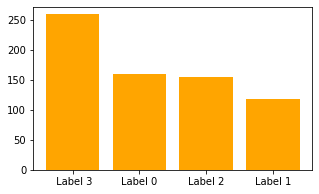

In [27]:
plt.figure(figsize=(5,3))
plt.bar(x = [' Label 3','Label 0','Label 2','Label 1'], height = value_bar, color = 'orange')

In [28]:
x = ds.drop('categorie_n', axis = 1)
y = ds['categorie_n']

### Splitting the data into train and test data
  
  * Immporting the library from the sklearn.model_selection
  * Split the dataset into 80:20 ratio
  * x_train and y_train are the trainning datasets
  * x_test and y_test are the testing datasets
  * After the spliting of the datasets the model is ready to be prepared!

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

x_train.shape , x_test.shape

((553, 3), (139, 3))

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

### Decision Tree Classifier Algorithm

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.


In [32]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_test,y_test)

0.8057553956834532

### XGBoost classifier
XGBoost provides a wrapper class to allow models to be treated like classifiers or regressors in the scikit-learn framework. The XGBoost model for classification is called XGBClassifier. We can create and and fit it to our training dataset. Models are fit using the scikit-learn API and the model.

Let us try an even more powerful algorithm called the XGBoost classifier which takes gradient boosting to extreme levels.

In [34]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(x_train,y_train)
xg.score(x_test,y_test)

0.8129496402877698

### Random Forest Classifier Algorithm

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [35]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_test,y_test)

0.60431654676259

### Logistic Regression 

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

In [37]:
logreg = LogisticRegression(max_iter = 1000)
logreg.fit(x_train,y_train)
logreg.score(x_test,y_test)

0.37410071942446044

### K-Nearest Neighbours Algorithm

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories. K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.

In [38]:
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 ) 
classifier.fit(x_train,y_train)
classifier.score(x_test,y_test)

0.4316546762589928

### Gausian NB Algorithm

This method is expected to be called several times consecutively on different chunks of a dataset so as to implement out-of-core or online learning. This is especially useful when the whole dataset is too big to fit in memory at once. This method has some performance and numerical stability overhead, hence it is better to call partial_fit on chunks of data that are as large as possible (as long as fitting in the memory budget) to hide the overhead.

In [39]:
clf = GaussianNB()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.3669064748201439

### Support Vector Machine Algorithm

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

In [40]:
svm = SVC()
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

0.3597122302158273

**As XgBoost Classifier is having the highest accuracy let's find out the classification report for it**

In [41]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = xg.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n',cm)

Confusion Matrix
 [[35  2  2  4]
 [ 0 18  4  3]
 [ 4  1 15  4]
 [ 2  0  0 45]]


**Confusion Matrix using Heat Map**

Text(42.0, 0.5, 'truth')

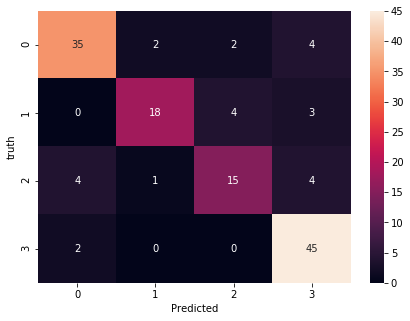

In [42]:
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('truth')

**Classification Report**

In [43]:
print(classification_report(y_test, y_pred, target_names=['class 0','class 1','class 2','class 3']))

              precision    recall  f1-score   support

     class 0       0.85      0.81      0.83        43
     class 1       0.86      0.72      0.78        25
     class 2       0.71      0.62      0.67        24
     class 3       0.80      0.96      0.87        47

    accuracy                           0.81       139
   macro avg       0.81      0.78      0.79       139
weighted avg       0.81      0.81      0.81       139



****************************************************
### Comparative analysis among the algorithms for this project

We have deployed six machine learning algorithms and every algorithm is deployed successfully without any hesitation. We have checked the accuracy of the models based on the accuracy score of each of the models. Now let's take a look at the scores of each models.

|Name of the Model|Accuracy Score|
|:---:|:---:|
|Logistic Regression|0.37|
|Decision Tree Classifier|0.81|
|Random Forest Classifier|0.60|
|Gausian NB Algorithm|0.37|
|KNN Algorithm|0.43|
|Support Vector Machine Algorithm|0.36|
|XgBoost Classifier|0.82|

**Comparing all those scores scored by the machine learning algorithms, it is clear that XgBoost Classifier is having the upper hand in case of this dataset and after this, we can use Decision Tree algorithm, which is also having good score as compared to the other deployed algorithms**

Best Fitted Models ranking - 
1. XgBoost Classifier
2. Decision Tree Classifier
3. Random Forest Classifier
4. KNN Algorithm
5. Logistic Regression
6. Gausian NB Algorithm
7. Support Vector Machine


Hooray!! The models are deployed successfully!

## Conclusion
1. 66 percent of the product have diamonds in them, more than any other gems, Its most popular gem. onyx and emeralds are into the next ranks.
2.  Jewels type include 4 category: rings, earring, necklaces and bracelets
Ranks of metals in every category are the same and equal: 1.White Gold 2.Pink Gold 3.Yellow Gold 4.Platinum 5.Non-Rhodiumized White Gold
3.  In every category Platinum in most valuable metal with a huge difference in price as $. After that White Gold have a second place but other metals are close in price for every category
4. As we saw earlier Platinium is the most valuable metal that the Cartier used in jewels. The mean price of Platinium jewels is more than 40000 Dollars after that white metal is second. "Yellow Gold" and "Non-Rhodiumized White Gold" are about equal in mean price, in last is pink gold with mean of 15000 Dollars that is about one of third of Platinium
5.  In all categories, diamond is the most popular gem in the making of jewelry. Exceedingly over 100 ring types include diamonds, in most cases more than one piece of diamond. This also rules for other categories of jewelry such as earrings, necklaces, and bracelets. Variety of the gems used in rings and bracelets are more than earrings and necklaces. Furthermore, Sapphires are also a popular gem used in ring production.
6. Earrings, Necklaces, and Rings with Rubies(gem) has a huge difference in the price of jewelry, but Emeralds(gem) in Bracelets shows the is a key factor in price determination. A closer look at necklaces reveals us that Tsavorite garnet has third place in price.
7. This plot shows us the mean price of products with gems on them As we could have predicted products that have Rubies on them are the most expensive jewelry in Cartier products. the next ranks belong to Tsavorite garnets, Emeralds, and the Chrysoprase. The middle gems on the above figure are equal in mean price
8. Comparing all those scores scored by the machine learning algorithms, it is clear that XgBoost Classifier is having the upper hand in case of this dataset and after this, we can use Decision Tree algorithm, which is also having good score as compared to the other deployed algorithms

### Hope this project will help you! Thank you!
